In [2]:
# !pip install anytree
import numpy as np
from collections import defaultdict
from anytree import Node, RenderTree
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 284.1 kB/s eta 0:00:001m281.8 kB/s eta 0:00:01

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
def levenshtein_dist(str_a, str_b, match, mismatch, delete, insert):
    # assume str_a is shorter, swap them if not
    # if len(str_a) > len(str_b):
    #     str_a, str_b = str_b, str_a

    # create a list with length of the shortest string and fill it with seq
    # from 0 to length
    dp_line = [i*delete for i in range(len(str_a)+1)]

    for i in range(1, len(str_b)+1):
        # create current value as we need to compare 3 elements,
        # 2 of them are in the same line in dp_line list.
        # Remaining is in the cur_val, for the beginning of the string
        # it equals the insert
        cur_val = i*insert
        for j in range(1, len(str_a)+1):

            # if elements of the strings are the same set param to 0, else 1
            if str_a[j - 1] == str_b[i - 1]:
                param = match
            else:
                param = mismatch

            # choose the maximum and assign it to new_val
            new_val = max(
                dp_line[j] + delete,
                cur_val + insert,
                dp_line[j-1] + param
            )

            # we can update the previous element in dp_line as we don't
            # need it anymore for next calculations
            dp_line[j-1] = cur_val
            # update cur_val
            cur_val = new_val

        # finally, after inner loop update the last element of dp_line
        dp_line[-1] = cur_val

    return np.array(dp_line)

In [139]:
def call_rec(str_a, str_b, match, mismatch, delete, insert, par):
    print(str_a, str_b)
    if len(str_b) <= 1 or len(str_a) <= 1:
        return 1
    div_ind = len(str_a)//2
    a_left = str_a[:div_ind]
    a_right = str_a[div_ind:]
    left = levenshtein_dist(
        str_b, a_left,  match, mismatch, delete, insert)
    right = levenshtein_dist(
        str_b[::-1], a_right[::-1], match, mismatch, delete, insert)
    best_b_div = np.argmax((left+right[::-1]))
    b_left = str_b[:best_b_div]
    b_right = str_b[best_b_div:]
    # create node to visalize
    left_node = Node(f"({a_left}, {b_left})", parent=par)
    right_node = Node(f"({a_right}, {b_right})", parent=par)
    depth_left = call_rec(a_left, b_left, match, mismatch, delete, insert, left_node)
    depth_right = call_rec(a_right, b_right, match, mismatch, delete, insert, right_node)
    return max(depth_left+1, depth_right+1)

In [140]:
def plot_tree(node, x, y, ax, depth, left=0, right=1):
    ax.text(
        x, y, node.name, bbox=dict(facecolor='skyblue', alpha=0.5, edgecolor='black'),
        horizontalalignment='center', verticalalignment='center'
    ) 
    if node.children:
        child_y = y - 1/depth
        # child_count = len(node.children)
        for i in range(0,2):
            try:    
                child = node.children[i]
                if i == 1:
                    child_x = right - (right-left)*0.25
                    ax.plot([x, child_x], [y, child_y], color='black')                     
                    plot_tree(child, child_x, child_y, ax, depth - 1, (left+right)*0.5, right)
                else:
                    child_x = left + (right-left)*0.25
                    ax.plot([x, child_x], [y, child_y], color='black')                     
                    plot_tree(child, child_x, child_y, ax, depth, left, (left+right)*0.5)
            except:
                pass

In [144]:
def get_tree(str_a, str_b, match, mismatch, delete, insert):
    root = Node(f"({str_a}, {str_b})")
    max_depth = call_rec(str_a, str_b, match, mismatch, delete, insert, root)
    print(max_depth)
    # Plotting the tree
    fig_x = 15
    fig_y = 10
    fig = plt.figure(figsize=(fig_x, fig_y))
    ax = fig.add_axes([0, 0, 1, 1])
    plot_tree(root, 0.5, 1, ax, max_depth)
    ax.set_aspect('equal')
    # ax.axis('off')
    plt.show()
    return root
    
    

AGTACGCA TATGC
AGTA TA
AG 
TA TA
T T
A A
CGCA TGC
CG TG
C T
G G
CA C
4


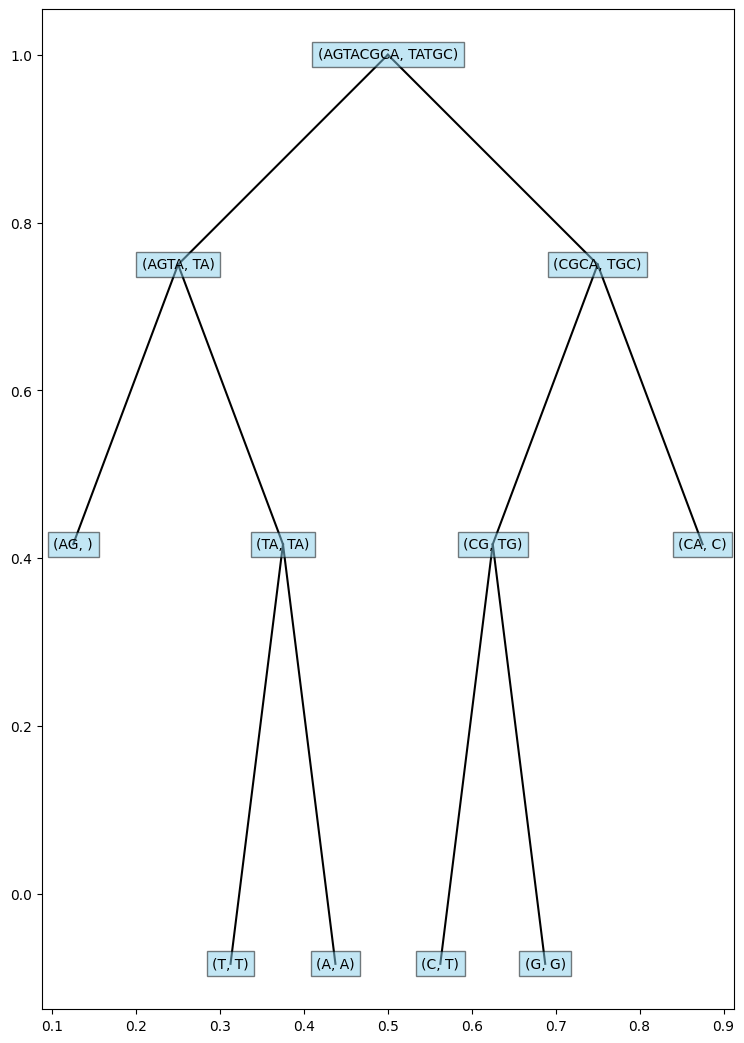

In [145]:
a = "AGTACGCA"
b = "TATGC"
# a = "AGTACGCAAFAGHHGHFHFH"
# b = "TATGCAAFGHGHGJGJGJ"
delete = -2
insert = -2
match = 2
mismatch = -1
root = get_tree(a, b, match, mismatch, delete, insert)

In [119]:
# fig, ax = plt.subplots(figsize=(20, 10))
# plot_tree(root, 0, 0, ax)
# ax.set_aspect('equal')
# ax.axis('off')
# plt.show()



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
